# Support vector machines (SVMs)

In [1]:
import addutils.toc ; addutils.toc.js(ipy_notebook=True)

In [2]:
import scipy.io
import numpy as np
import pandas as pd
from addutils import css_notebook
css_notebook()

## 1 Support Vector Machines

`Support vector machines (SVMs)` are a set of supervised learning methods used for classification, regression and outliers detection.

A SVM constructs a hyper-plane or set of hyper-planes in a high or infinite dimensional space with the largest distance to the nearest training data points of any class **(functional margin)**. In general, the larger the margin the lower the generalization error of the classifier.

The **advantages** of support vector machines include:

* Effective in **high dimensional spaces**.
* Effective in cases where **n Features > n Samples**.
* Memory efficient
* Versatile: different Kernel functions can be specified for the decision function

The **disadvantages** of support vector machines are:

* **Low performances when n Features >> n Samples**.
* Do not directly provide probability estimates

<img src="utilities/svm.png"  style="max-width: 60%"/>

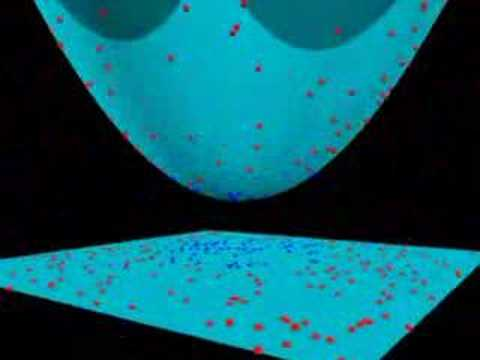

In [10]:
from IPython.display import YouTubeVideo
YouTubeVideo('3liCbRZPrZA', width=800, height=420)

## 2 SVM for Classification

`SVC and NuSVC` are similar methods, but accept slightly different sets of parameters and have different mathematical formulations (see section Mathematical formulation). `LinearSVC` is another implementation of Support Vector Classification for the case of a linear kernel.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
import bokeh.plotting as bk
bk.output_notebook()

Loading BokehJS ...

In [5]:
from matplotlib.colors import ListedColormap
from pandas.tools.plotting import scatter_matrix
from sklearn import svm, datasets, preprocessing, neighbors, model_selection

d = datasets.load_iris()  
X = pd.DataFrame(d.data, columns=d.feature_names)
y = d.target
print(X.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


In [6]:
from sklearn import svm, datasets

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target
h = .02               # step size in the mesh
C = 1.0               # SVM regularization parameter

std_svc = svm.SVC(kernel='linear', C=C).fit(X,y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X,y)
pol_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X,y)
lin_svc = svm.LinearSVC(C=C).fit(X,y)

In [7]:
import addutils.palette as pal
import seaborn as sns
from bokeh.models.mappers import LinearColorMapper

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xs = np.arange(x_min, x_max, h*2)
ys = np.arange(y_min, y_max, h*2)
xx, yy = np.meshgrid(xs, ys)
xx = xx.ravel()
yy = yy.ravel()

titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel',
          'LinearSVC (linear kernel)']

grid = []
palette = list(map(pal.to_hex, sns.color_palette('Paired', 6)))
palette_dots = palette[1::2]    # colours in odd indices 
palette_patches = palette[::2]  # colours in even indices
# Bokeh understands the mapping interval for the colors as open on the high side.
# So we have to customize the color mapper, and raise the upper limit a bit
# to prevent Bokeh from discarding any colours. 
# max(Z) is 2, so 2.1 is fine for the upper limit.
patches_cmapper = LinearColorMapper(low=0, high=2.1, palette=palette_patches)

for i, clf in enumerate((std_svc, rbf_svc, pol_svc, lin_svc)):
    # Plot the decision boundary assigning a color to each point in the mesh
    Z = clf.predict(np.c_[xx, yy])
    Z = Z.reshape((ys.size, xs.size))
    
    # Plot the training points
    fig = bk.figure(plot_width=360, plot_height=280, title=titles[i],
                   x_range=(x_min, x_max), y_range=(y_min, y_max))
    fig.title.text_font_size = '10pt'
    fig.axis.major_label_text_color = None
    fig.axis.major_tick_line_color = None
    fig.axis.minor_tick_line_color = None
    fig.image(image=[Z*0.99 + 0.1], x=[x_min], y=[y_min], 
              dw=[x_max-x_min], dh=[y_max-y_min],
              color_mapper=patches_cmapper)
    fig.scatter(X[:, 0], X[:, 1], size=6,
                line_color='black', line_alpha=0.5,
                fill_color=[ palette_dots[j] for j in y ])
    grid.append(fig)
    
bk.show(bk.gridplot([[grid[0], grid[1]], [grid[2], grid[3]]]))

## 3 SVM for Regression

The method of Support Vector Classification can be extended to solve regression problems. This method is called Support Vector Regression.

The model produced by support vector classification (as described above) depends only on a subset of the training data, because the cost function for building the model does not care about training points that lie beyond the margin. Analogously, the model produced by Support Vector Regression depends only on a subset of the training data, because the cost function for building the model ignores any training data close to the model prediction.

As with classification classes, the fit method will take as argument vectors X, y, only that in this case y is expected to have floating point values instead of integer values:

In [8]:
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
svm_svr = svm.SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                  epsilon=0.1, gamma='auto', kernel='rbf',
                  shrinking=True, tol=0.01, verbose=False)
svm_svr.fit(X, y) 
svm_svr.predict([[1, 1]])

array([ 1.5])

**Support Vector Regression (SVR) using linear and non-linear kernels:** this is a simple example of 1D regression using linear, polynominial and RBF kernels.



In [9]:
# Generate data and add noise to target
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - np.random.rand(8))

###############################################################################
# Fit regression model
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

###############################################################################
# look at the results
fig = bk.figure(plot_width=600, plot_height=500, title="Support Vector Regression")
fig.title.text_font_size = '12pt'
fig.scatter(X[:,0], y, color='black', legend='data', size=8)
fig.line(X[:,0], y_rbf, color='green', legend='RBF model')
fig.line(X[:,0], y_lin, color='red', legend='Linear model')
fig.line(X[:,0], y_poly, color='blue', legend='Polynomial model')
fig.xaxis.axis_label = 'data'
fig.yaxis.axis_label = 'target'
fig.axis.axis_label_text_font_size = '11pt'
bk.show(fig)

---

Visit [www.add-for.com](<http://www.add-for.com/IT>) for more tutorials and updates.

This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.